# 02 - Feature Engineering & Train-Test Split

> M·ª•c ti√™u: T·∫°o th√™m c√°c ƒë·∫∑c tr∆∞ng t·ªï h·ª£p quan tr·ªçng, ph√¢n t√≠ch t∆∞∆°ng quan, chu·∫©n b·ªã d·ªØ li·ªáu hu·∫•n luy·ªán m√¥ h√¨nh.

## 2.1: Import th∆∞ vi·ªán v√† ƒë·ªçc d·ªØ li·ªáu ƒë√£ l√†m s·∫°ch

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
df = pd.read_csv("../data/processed/processed.csv")
df.head()

gender  age  city  academic_pressure  cgpa  study_satisfaction  \
0       0   24    49                2.0  5.90                 5.0   
1       1   24    19                3.0  6.10                 3.0   
2       0   19    48                2.0  8.52                 4.0   
3       0   19    43                5.0  5.64                 5.0   
4       0   20     2                5.0  7.25                 3.0   

   sleep_duration  dietary_habits  degree  \
0               0               2       3   
1               0               2      26   
2               2               0      26   
3               2               2      26   
4               0               1      26   

   have_you_ever_had_suicidal_thoughts_?  work/study_hours  financial_stress  \
0                                      0               3.0               2.0   
1                                      1              11.0               1.0   
2                                      0               6.0               2.0   
3                                      1               4.0               5.0   
4                                      1              10.0               3.0   

   family_history_of_mental_illness  depression  
0                                 1           0  
1                                 1           1  
2                                 1           0  
3                                 1           1  
4                                 0           1

## 2.2: T·∫°o ƒë·∫∑c tr∆∞ng t·ªï h·ª£p m·ªõi

In [23]:
# T·∫†O C√ÅC ƒê·∫∂C TR∆ØNG T·ªîNG H·ª¢P M·ªöI

# Balanced_Life_Score: m√¥ h√¨nh h√≥a s·ª± c√¢n b·∫±ng h·ªçc t·∫≠p ‚Äì cu·ªôc s·ªëng
df['balanced_life_score'] = (
    df['sleep_duration'] +
    df['study_satisfaction'] -
    df['work/study_hours']
) / 3
# (Total_Stress ch∆∞a c√≥ n√™n ta t√≠nh nhanh tr∆∞·ªõc)
df['total_stress'] = (
    df['academic_pressure'] +
    df['financial_stress'] +
    df['work/study_hours']
)

# Sleep_Stress_Ratio: t·ª∑ l·ªá gi·∫•c ng·ªß tr√™n √°p l·ª±c
df['sleep_stress_ratio'] = df['sleep_duration'] / (df['total_stress'] + 1)

# Multidimensional_Stress: t·ªïng √°p l·ª±c c√≥ tr·ªçng s·ªë
# Y·∫øu t·ªë	Tr·ªçng s·ªë	L√Ω do
# Academic Pressure	0.5	√Åp l·ª±c h·ªçc t·∫≠p l√† ngu·ªìn stress l·ªõn nh·∫•t ƒë·ªëi v·ªõi sinh vi√™n
# Financial Stress	0.3	Ti·ªÅn b·∫°c c≈©ng r·∫•t quan tr·ªçng nh∆∞ng √≠t h∆°n h·ªçc t·∫≠p
# Work/Study Hours	0.2	S·ªë gi·ªù l√†m vi·ªác ·∫£nh h∆∞·ªüng nh∆∞ng ch·ªâ gi√°n ti·∫øp ƒë·∫øn stress t·ªïng

df['multidimensional_stress'] = (
    df['academic_pressure'] * 0.5 +
    df['financial_stress'] * 0.3 +
    df['work/study_hours'] * 0.2
)

# Resilience_Index: ch·ªâ s·ªë ph·ª•c h·ªìi t√¢m l√Ω
df['resilience_index'] = (
    df['cgpa'] + df['study_satisfaction']
) / (1 + df['family_history_of_mental_illness'])

# Suicidal_Risk_Index: nguy c∆° suy s·ª•p
# Th√†nh ph·∫ßn	√ù nghƒ©a	M·ª•c ti√™u m√¥ h√¨nh h√≥a
# Academic Pressure * 1.5	√Åp l·ª±c h·ªçc t·∫≠p nh√¢n 1.5 l·∫ßn	C∆∞·ªùng ƒëi·ªáu h√≥a ·∫£nh h∆∞·ªüng c·ªßa stress h·ªçc t·∫≠p
# (10 - Sleep Duration)	Th·ªùi l∆∞·ª£ng thi·∫øu ng·ªß	Ng·ªß √≠t ‚Üí tƒÉng nguy c∆° tr·∫ßm c·∫£m
# 3 * suicidal thoughts	C√≥ √Ω ƒë·ªãnh t·ª± t·ª≠ ‚Üí nh√¢n tr·ªçng s·ªë 3	Bi·∫øn n√†y c·ª±c k·ª≥ quan tr·ªçng, nh·∫•n m·∫°nh m·∫°nh m·∫Ω
df['suicidal_risk_index'] = (
    df['academic_pressure'] * 1.5 +
    (10 - df['sleep_duration']) +
    3 * df['have_you_ever_had_suicidal_thoughts_?']
)


In [24]:
df.head()

gender  age  city  academic_pressure  cgpa  study_satisfaction  \
0       0   24    49                2.0  5.90                 5.0   
1       1   24    19                3.0  6.10                 3.0   
2       0   19    48                2.0  8.52                 4.0   
3       0   19    43                5.0  5.64                 5.0   
4       0   20     2                5.0  7.25                 3.0   

   sleep_duration  dietary_habits  degree  \
0               0               2       3   
1               0               2      26   
2               2               0      26   
3               2               2      26   
4               0               1      26   

   have_you_ever_had_suicidal_thoughts_?  work/study_hours  financial_stress  \
0                                      0               3.0               2.0   
1                                      1              11.0               1.0   
2                                      0               6.0               2.0   
3                                      1               4.0               5.0   
4                                      1              10.0               3.0   

   family_history_of_mental_illness  depression  balanced_life_score  \
0                                 1           0             0.666667   
1                                 1           1            -2.666667   
2                                 1           0             0.000000   
3                                 1           1             1.000000   
4                                 0           1            -2.333333   

   total_stress  sleep_stress_ratio  multidimensional_stress  \
0           7.0            0.000000                      2.2   
1          15.0            0.000000                      4.0   
2          10.0            0.181818                      2.8   
3          14.0            0.133333                      4.8   
4          18.0            0.000000                      5.4   

   resilience_index  suicidal_risk_index  
0              5.45                 13.0  
1              4.55                 17.5  
2              6.26                 11.0  
3              5.32                 18.5  
4             10.25                 20.5

## 2.3: Ph√¢n t√≠ch t∆∞∆°ng quan gi·ªØa c√°c ƒë·∫∑c tr∆∞ng

In [25]:
# X√°c ƒë·ªãnh c√°c c·ªôt ban ƒë·∫ßu theo ƒë·ªãnh d·∫°ng snake_case
original_cols = [
    'age','gender','city', 'degree',
    'dietary_habits', 'sleep_duration', 'work/study_hours',
    'academic_pressure', 'study_satisfaction', 'financial_stress',
    'have_you_ever_had_suicidal_thoughts_?', 'family_history_of_mental_illness', 'cgpa'
]

# C√°c ƒë·∫∑c tr∆∞ng m·ªõi (c≈©ng ph·∫£i ƒë√∫ng snake_case nh∆∞ b·∫°n ƒë√£ t·∫°o tr∆∞·ªõc ƒë√≥)
new_feature_cols = [
    'balanced_life_score',
    'sleep_stress_ratio',
    'multidimensional_stress',
    'resilience_index',
    'suicidal_risk_index'
]

# C·ªôt nh√£n
target_col = ['depression']

# T·∫°o th·ª© t·ª± m·ªõi
final_column_order = original_cols + new_feature_cols + target_col

# S·∫Øp x·∫øp l·∫°i
df = df[final_column_order]

C:\Users\admin\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


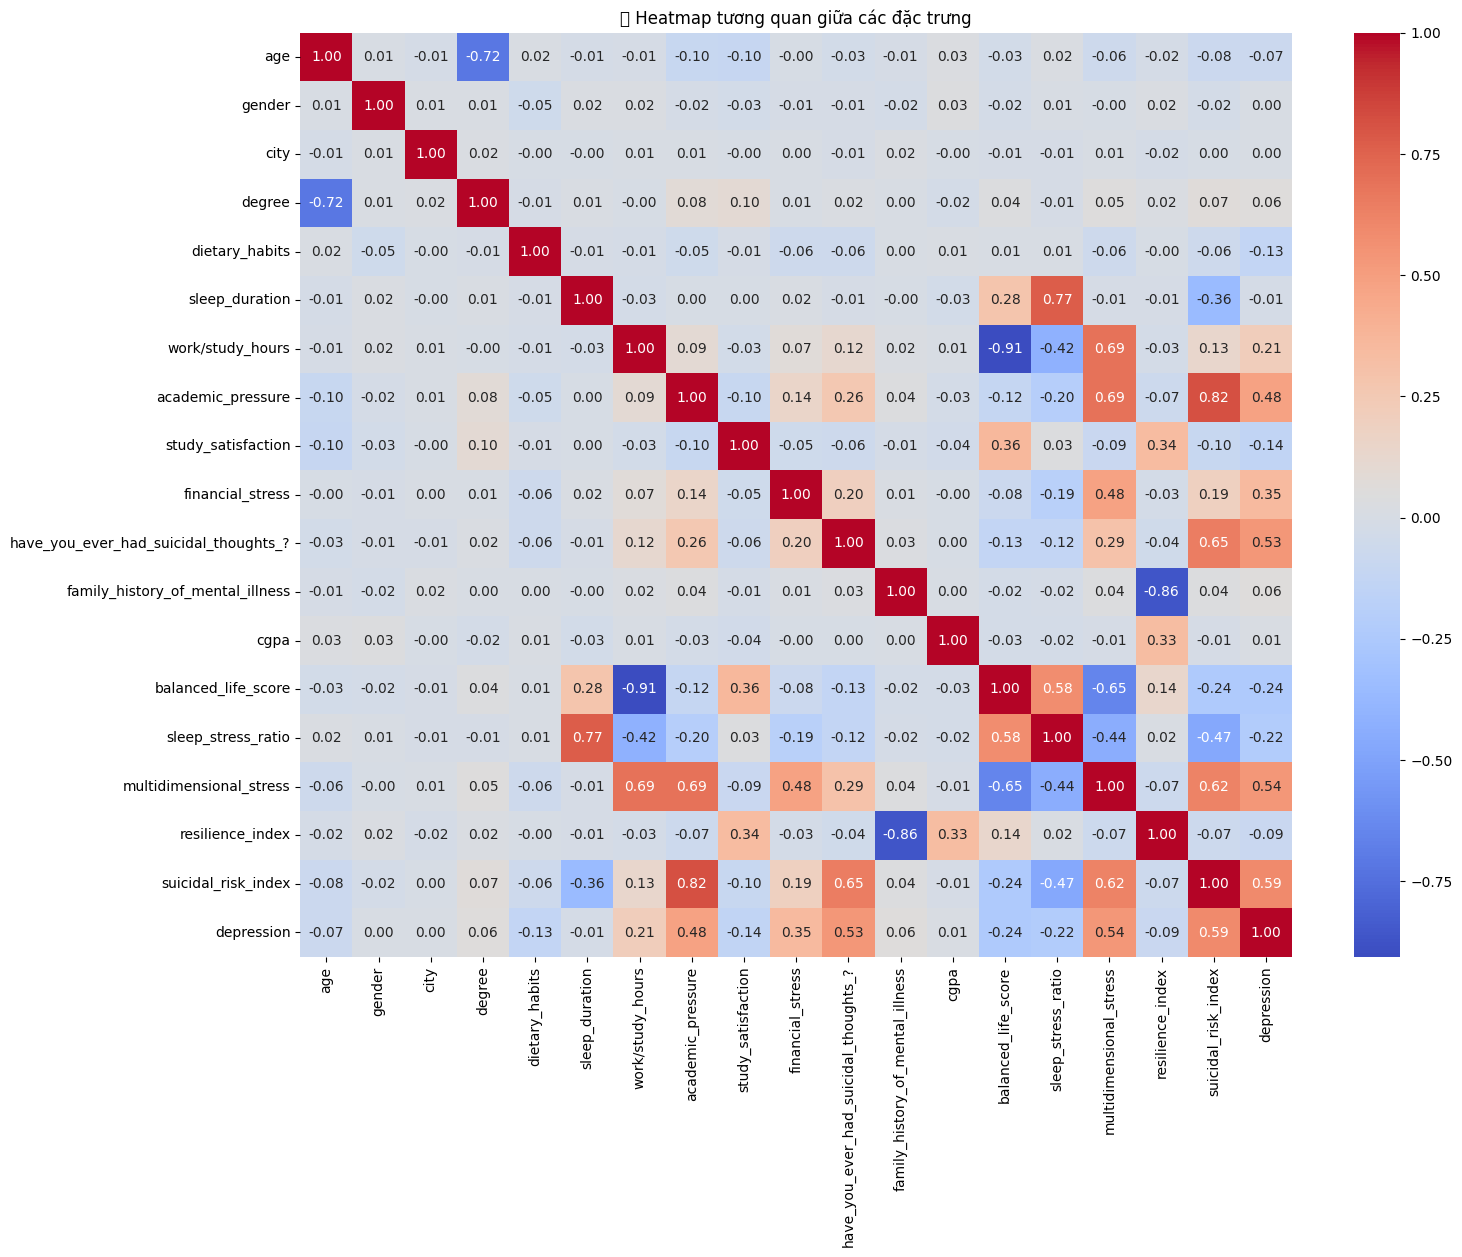

In [26]:
plt.figure(figsize=(16, 12))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("üìä Heatmap t∆∞∆°ng quan gi·ªØa c√°c ƒë·∫∑c tr∆∞ng")
plt.show()

## 2.4: Ph√¢n t√≠ch ph√¢n ph·ªëi nh√£n Depression

C:\Users\admin\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


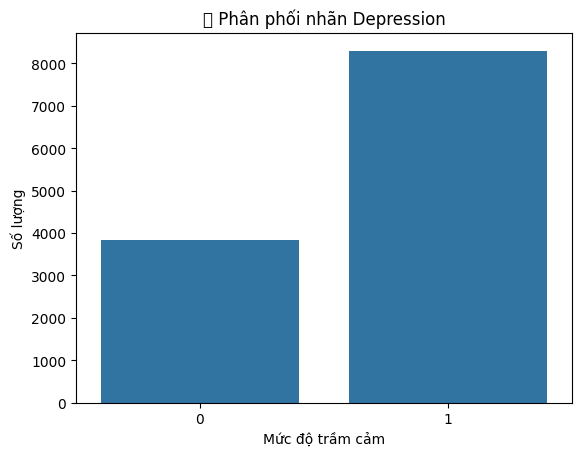

depression
1    8304
0    3836
Name: count, dtype: int64


In [27]:
sns.countplot(x='depression', data=df)
plt.title("üìä Ph√¢n ph·ªëi nh√£n Depression")
plt.xlabel("M·ª©c ƒë·ªô tr·∫ßm c·∫£m")
plt.ylabel("S·ªë l∆∞·ª£ng")
plt.show()

# In s·ªë l∆∞·ª£ng theo t·ª´ng l·ªõp
print(df['depression'].value_counts())

In [28]:
# X√°c ƒë·ªãnh c√°c c·ªôt ban ƒë·∫ßu theo ƒë·ªãnh d·∫°ng snake_case
original_cols = [
    'age','gender','city', 'degree',
    'dietary_habits', 'sleep_duration', 'work/study_hours',
    'academic_pressure', 'study_satisfaction', 'financial_stress',
    'have_you_ever_had_suicidal_thoughts_?', 'family_history_of_mental_illness', 'cgpa'
]

# C√°c ƒë·∫∑c tr∆∞ng m·ªõi (c≈©ng ph·∫£i ƒë√∫ng snake_case nh∆∞ b·∫°n ƒë√£ t·∫°o tr∆∞·ªõc ƒë√≥)
new_feature_cols = [
    'balanced_life_score',
    'sleep_stress_ratio',
    'multidimensional_stress',
    'resilience_index',
    'suicidal_risk_index'
]

# C·ªôt nh√£n
target_col = ['depression']

# T·∫°o th·ª© t·ª± m·ªõi
final_column_order = original_cols + new_feature_cols + target_col

# S·∫Øp x·∫øp l·∫°i
df = df[final_column_order]


## 2.5: T√°ch t·∫≠p train/test

In [29]:
# T√°ch X v√† y
X = df.drop('depression', axis=1)
y = df['depression']

# T√°ch 80% Train, 20% Test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)



## 2.6: L∆∞u d·ªØ li·ªáu t√°ch s·∫µn (ƒë·ªÉ c√°c notebook sau d√πng l·∫°i nhanh)

In [30]:
X_train.to_csv("../data/processed/X_train.csv", index=False)
X_test.to_csv("../data/processed/X_test.csv", index=False)
y_train.to_csv("../data/processed/y_train.csv", index=False)
y_test.to_csv("../data/processed/y_test.csv", index=False)

print(" ƒê√£ l∆∞u X_train, X_test, y_train, y_test v√†o th∆∞ m·ª•c /data/")


 ƒê√£ l∆∞u X_train, X_test, y_train, y_test v√†o th∆∞ m·ª•c /data/


In [31]:
df.head()

age  gender  city  degree  dietary_habits  sleep_duration  \
0   24       0    49       3               2               0   
1   24       1    19      26               2               0   
2   19       0    48      26               0               2   
3   19       0    43      26               2               2   
4   20       0     2      26               1               0   

   work/study_hours  academic_pressure  study_satisfaction  financial_stress  \
0               3.0                2.0                 5.0               2.0   
1              11.0                3.0                 3.0               1.0   
2               6.0                2.0                 4.0               2.0   
3               4.0                5.0                 5.0               5.0   
4              10.0                5.0                 3.0               3.0   

   have_you_ever_had_suicidal_thoughts_?  family_history_of_mental_illness  \
0                                      0                                 1   
1                                      1                                 1   
2                                      0                                 1   
3                                      1                                 1   
4                                      1                                 0   

   cgpa  balanced_life_score  sleep_stress_ratio  multidimensional_stress  \
0  5.90             0.666667            0.000000                      2.2   
1  6.10            -2.666667            0.000000                      4.0   
2  8.52             0.000000            0.181818                      2.8   
3  5.64             1.000000            0.133333                      4.8   
4  7.25            -2.333333            0.000000                      5.4   

   resilience_index  suicidal_risk_index  depression  
0              5.45                 13.0           0  
1              4.55                 17.5           1  
2              6.26                 11.0           0  
3              5.32                 18.5           1  
4             10.25                 20.5           1

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12140 entries, 0 to 12139
Data columns (total 19 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   age                                    12140 non-null  int64  
 1   gender                                 12140 non-null  int64  
 2   city                                   12140 non-null  int64  
 3   degree                                 12140 non-null  int64  
 4   dietary_habits                         12140 non-null  int64  
 5   sleep_duration                         12140 non-null  int64  
 6   work/study_hours                       12140 non-null  float64
 7   academic_pressure                      12140 non-null  float64
 8   study_satisfaction                     12140 non-null  float64
 9   financial_stress                       12140 non-null  float64
 10  have_you_ever_had_suicidal_thoughts_?  12140 non-null  int64  
 11  fa